In [1]:
# all imports
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
# TODO: import additional sklearn dependencies here

import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

# notebook settings
from IPython.display import display
pd.options.display.max_columns = None

# Annoying damn warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
from scipy.stats import loguniform
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor

## Read in Train/Test split

In [3]:
# X_train = pd.read_pickle('X_train.pkl')
# X_test = pd.read_pickle('X_test.pkl')
# y_train = pd.read_pickle('y_train.pkl')
# y_test = pd.read_pickle('y_test.pkl')
above = '../../../'
# data = pd.read_pickle(above + 'post_eda.pkl')
data = pd.read_pickle(above + 'd_PCmd.pkl')

In [4]:
scaler = StandardScaler()
y = data.loc[:, data.columns == 's_sale_price']
X = data.loc[:, data.columns != 's_sale_price']
scaler.fit(X)
X = scaler.fit_transform(X)

In [6]:
# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Linear Regression:
**Note that there are no hyperparameters to tune for simple Linear Regression**

In [9]:
# Call linear regression and report score
reg = LinearRegression()
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

0.48480608279002557

In [10]:
scores = []
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    reg = LinearRegression()
    reg.fit(X_train, y_train)
    scores.append(reg.score(X_test, y_test))
np.array(scores).mean()

0.5426771702176896

## Ridge Regression:
**Hyperparameters: Regularization Strength (alpha)**

In [11]:
# Ridge regression with default parameters
ridge = Ridge()
ridge.fit(X_train, y_train)
ridge.score(X_test, y_test)

0.542573814932333

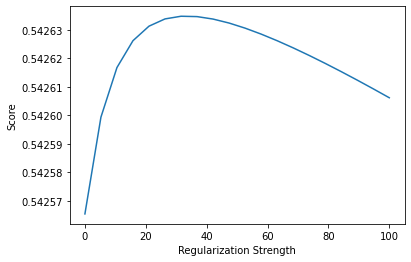

In [12]:
# Ridge regression hyperparameter search
ridge_alphas = np.linspace(0.001, 100, 20)

ridge_alph = []
ridge_scores = []
for i in ridge_alphas:
    ridge2 = Ridge(alpha = i)
    ridge2.fit(X_train, y_train)
    
    ridge_alph.append(i)
    ridge_scores.append(ridge2.score(X_test, y_test))
    
plt.plot(ridge_alph, ridge_scores)
plt.xlabel('Regularization Strength')
plt.ylabel('Score')
plt.show()

## Lasso Regression:
**Hyperparameters: L1 Multiplier (alpha)**

In [13]:
# Lasso regression
lasso = Lasso()
lasso.fit(X_train, y_train)
lasso.score(X_test, y_test)

0.5426155583330092

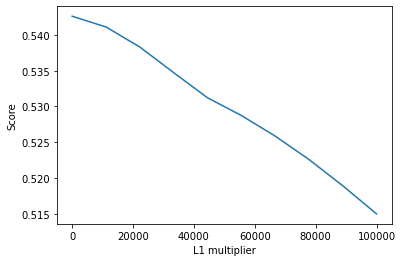

In [14]:
# Lasso regression hyperparameter search
lasso_alphas = np.linspace(0.001, 100000, 10)

lasso_alph = []
lasso_scores = []
for i in lasso_alphas:
    lasso2 = Lasso(alpha = i)
    lasso2.fit(X_train, y_train)
    
    lasso_alph.append(i)
    lasso_scores.append(lasso2.score(X_test, y_test))
    
plt.plot(lasso_alph, lasso_scores)
plt.xlabel('L1 multiplier')
plt.ylabel('Score')
plt.show()

## Elastic Net Regression:
**Hyperparameters: Penalty Multiplier (alpha)**

In [15]:
# Elastic Net regression
elasticnet = ElasticNet()
elasticnet.fit(X_train, y_train)
elasticnet.score(X_test, y_test)

0.48499057799289025

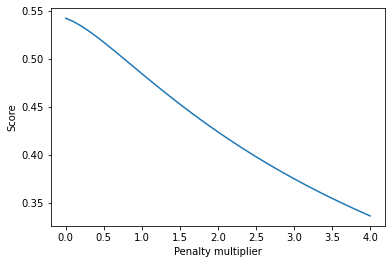

In [16]:
# Elastic net regression hyperparameter search
elastic_alphas = np.linspace(0.001, 4, 40)

elastic_alph = []
elastic_scores = []
for i in elastic_alphas:
    elastic2 = ElasticNet(alpha = i)
    elastic2.fit(X_train, y_train)
    
    elastic_alph.append(i)
    elastic_scores.append(elastic2.score(X_test, y_test))
    
plt.plot(elastic_alph, elastic_scores)
plt.xlabel('Penalty multiplier')
plt.ylabel('Score')
plt.show()

## Miscellaneous
**Decision tree default score because why not**

In [7]:
# Call Decision Tree Regressor and report score
dtr2 = DecisionTreeRegressor()
dtr2 = dtr2.fit(X_train, y_train)
dtr2.score(X_test, y_test)

0.4554597826453448

In [8]:
scores = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    dtr2 = DecisionTreeRegressor()
    dtr2 = dtr2.fit(X_train, y_train)
    scores.append(dtr2.score(X_test, y_test))
np.array(scores).mean()

0.5212893086752817